# Case study on Pre-processing

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

# 1. Load the dataset into python environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [3]:
df.set_index(['PassengerId'], inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
df.shape

(891, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Insight: From the above data we come to know that there are total 11 features and 891 observation. Out of 11 features, 2 of them are of float data type, 4 of them are of int data type and 5 are of object. Also we can say that there are soming missing vales in the data. There are missing values in the age, Cabin and Embarked column

# 4. Fill in all the missing values present in all the columns in the dataset

In [7]:
n = len(pd.unique(df['Cabin']))
n

148

In [8]:
df.drop(['Cabin'], inplace= True, axis=1)

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


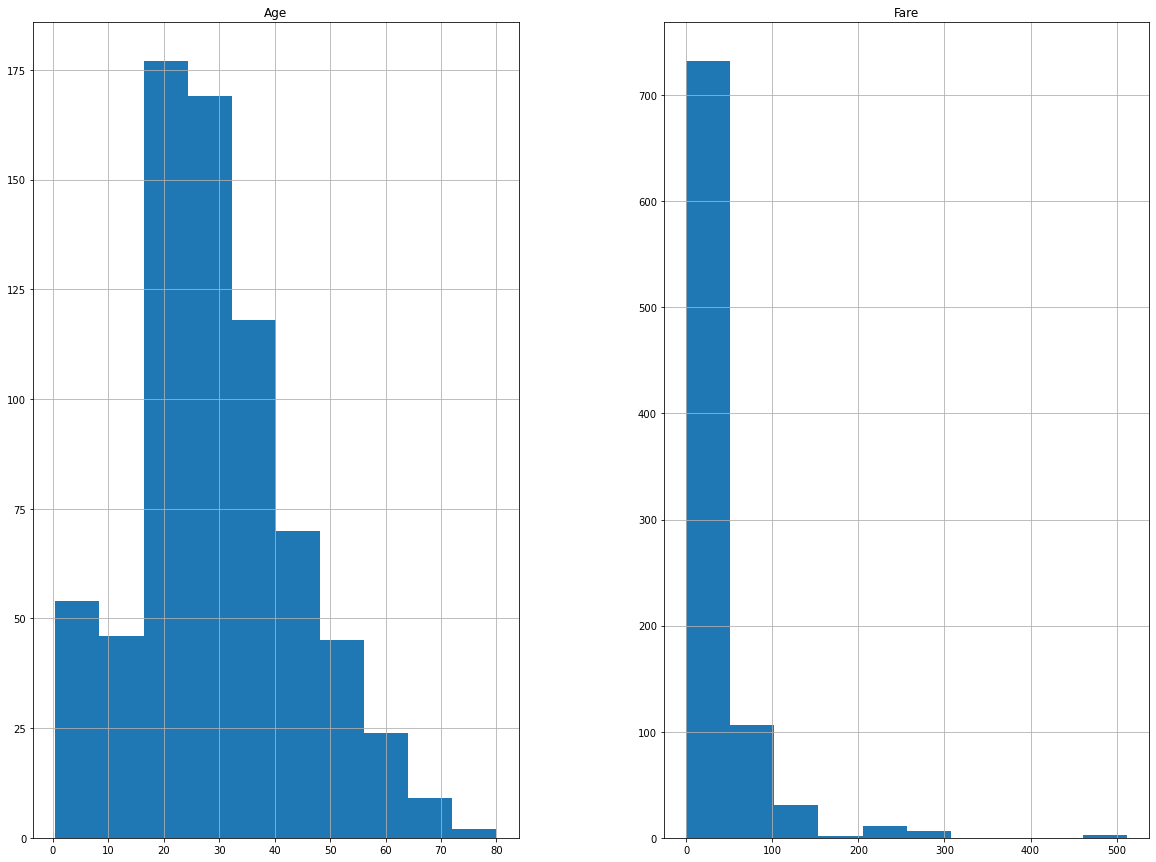

In [10]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

We have ploated the graph with all float type datatype. And as the graph is right skwed we are using meadian to fill the missing data

In [11]:
df['Age']= df['Age'].fillna(df['Age'].median())

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

Embarked is a categorical data so we can use mode to fill the missing value.

In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now we have a dataset with zero null values.

# 5. Check and handle outliers in at least 3 columns in the dataset

In [15]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Box plot of Age')

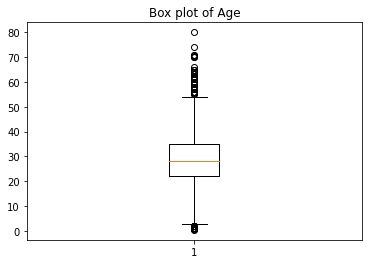

In [16]:
plt.boxplot(df['Age'])
plt.title('Box plot of Age')

In [17]:
Q1 = np.percentile(df['Age'],25,interpolation='midpoint')
Q2 = np.percentile(df['Age'],50,interpolation='midpoint')
Q3 = np.percentile(df['Age'],75,interpolation='midpoint')
IQR = Q3- Q1
lower_lim = Q1- 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [18]:
outlier = []
for x in df['Age']:
    if ((x> up_lim) or (x<lower_lim)):
        outlier.append(x)

In [19]:
ind1 = df['Age']>up_lim
df.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [20]:
ind1 = df['Age']<lower_lim
df.loc[ind1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [21]:
df.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832, 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace= True)

Text(0.5, 1.0, 'Box plot of Age')

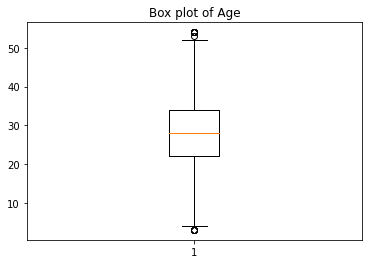

In [22]:
plt.boxplot(df['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of Pclass')

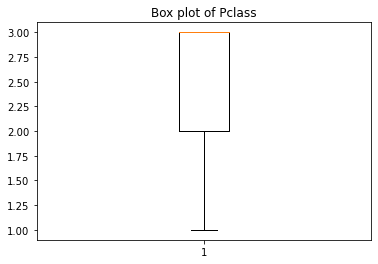

In [23]:
plt.boxplot(df['Pclass'])
plt.title('Box plot of Pclass')

There is no outliers in Pclass so no need to fin the IQR.

Text(0.5, 1.0, 'Box plot of SibSp')

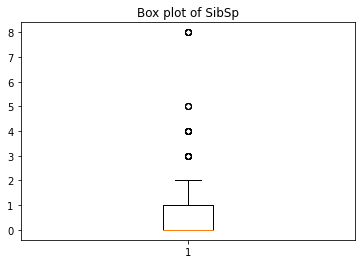

In [24]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

In [25]:
Q1 = np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(df['SibSp'],75,interpolation='midpoint')
IQR = Q3- Q1
lower_lim = Q1- 1.5*IQR
up_lim = Q3 + 1.5*IQR

In [26]:
outlier = []
for x in df['SibSp']:
    if ((x> up_lim) or (x<lower_lim)):
        outlier.append(x)

In [27]:
ind1 = df['SibSp']>up_lim
df.loc[ind1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

From the above boxplot we can see that there are outliers only in the upper quartile.hence removing the outliers above the upper quartile.

In [28]:
df.drop([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864], inplace= True)

Text(0.5, 1.0, 'Box plot of SibSp')

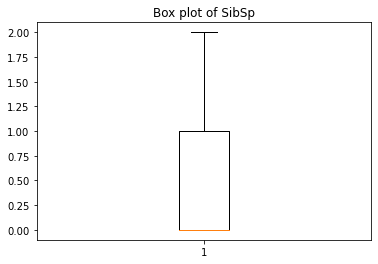

In [29]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

Before doing scaling we will have to convert the categorical data into 1s and 0's

In [30]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [31]:
df.Ticket.nunique()

643

In [32]:
df2 = df.drop(['Name', 'Ticket'], axis=1)

There is large number of unique values in ticket and name and this doesnot effect the data. so we are droping this values.

In [33]:
df2.Sex.nunique()

2

In [34]:
df2 = pd.get_dummies(df2)

In [35]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [36]:
y = df2['Survived']
X = df2.drop('Survived', axis=1)

In [37]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,2.318066,29.114504,0.311705,0.296438,30.295599,0.349873,0.650127,0.193384,0.089059,0.717557
std,0.828231,9.814762,0.527743,0.757073,48.962228,0.477233,0.477233,0.395203,0.285010,0.450474
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.125000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,34.000000,1.000000,0.000000,27.750000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from sklearn import preprocessing

In [39]:
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))

In [40]:
X = min_max.fit_transform(X)

In [41]:
X = pd.DataFrame(X)

In [42]:
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.659033,0.512049,0.155852,0.049406,0.059133,0.349873,0.650127,0.193384,0.089059,0.717557
std,0.414115,0.192446,0.263871,0.126179,0.095568,0.477233,0.477233,0.395203,0.285010,0.450474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.394608,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.490196,0.000000,0.000000,0.025374,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.607843,0.500000,0.000000,0.054164,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
